# Analysis for CaDDE 1D

This code relies upon the following packages:

- `pandas`: Open-source statistical package add-on that relies on dataframes
- `pingouin`: Plotter
- `matplotlib`: Creating nice graphical plots
- `tabulate`: Simple table output maker

In [2]:
import pandas
import pingouin 
import matplotlib.pyplot as pyplot 
import tabulate
import numpy as np

/Users/elviskasonlin/.pyenv/versions/3.9.7/envs/sclab/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Preprocessing

Define function for reading a csv file and return a pandas dataframe

In [11]:
def readCsvAsDf(file_name):
    """
    Reads a given .csv file and converts it into a pandas dataframe
        * file_name (`str`): The name of the .csv file
    Returns:
        * If successful, returns a pandas dataframe
        * If error, returns a tuple with the following:
            * 0 (`int`): An integer to flag that the operation was unsuccessful
            * Error message (`str`): A custom error message
    """
    df = None
    try:
        my_file = open(file_name) # Opens the given file
        df = pandas.read_csv(my_file, header=0, index_col=0) # Change to Dataframe in pandas
        my_file.close() # Closes the given file
    except Exception as err:
        print(err)
        return (0, "Error with reading csv file")

    return df

Read data file

In [12]:
data_file = readCsvAsDf('data-30_40_sys-cleaned.csv')

In [13]:
#print(data_file)
#print(tabulate.tabulate(data_file, headers='keys', tablefmt="fancy_grid"))

Preprocess original data to make it dataframe compliant

In [14]:
# Get row & column counts of the raw data
current_table_shape = data_file.shape

col_names_trials = ["Reading 1 with Offset", "Reading 2 with Offset", "Reading 3 with Offset"]
col_names_new_df = ['Blade Count', 'Blade Width mm', 'Blade Length mm', 'Pitch at Root deg', 'Result N']
col_names_factors = ['Blade Count', 'Blade Width mm', 'Blade Length mm', 'Pitch at Root deg']

In [67]:
new_df = pandas.DataFrame(data=None, columns=col_names_new_df) # Create a brand new dataframe

# ======================================================================================
# The code below essentially adds individual row entries for every trial per experiment
#  So since we have 3 readings, for every experiment, we will be adding 3 entries that 
#  only have its result value changed.
# You won't need it if you've already pre-processed the data outside
# ======================================================================================
# WHY?
# Because for some reason, ANOVA throws an error with only the average reading per exp.
# ======================================================================================

for idx in range(current_table_shape[0]):
    # Get all the results from different trials as a pandas series
    temp = data_file.iloc[idx][col_names_trials] 
    # Set an empty list to serve as a new row entry
    to_insert = list()
    
    # To add in all the factor values into the to_insert list
    for i in range(len(col_names_factors)):
        to_insert.append(data_file.iloc[idx][col_names_new_df[i]])
    
    # Add a new column entry for results
    to_insert.append(None)
    
    # For each trial, insert a new row entry to the new_df dataframe
    for i in range(len(temp)):
        to_insert[-1] = abs(temp[i]) * 9.81 / 1000
        #print(len(to_insert), len(new_df))
        
        cur_row_count = len(new_df.index)
        new_df.loc[cur_row_count] = to_insert

print(new_df)

    Blade Count  Blade Width mm  Blade Length mm  Pitch at Root deg  Result N
0           2.0            12.0             30.0               45.0  0.063078
1           2.0            12.0             30.0               45.0  0.063471
2           2.0            12.0             30.0               45.0  0.063569
3           2.0            16.0             30.0               30.0  0.061803
4           2.0            16.0             30.0               30.0  0.061214
5           2.0            16.0             30.0               30.0  0.061509
6           3.0            12.0             30.0               30.0  0.060920
7           3.0            12.0             30.0               30.0  0.060724
8           3.0            12.0             30.0               30.0  0.060724
9           3.0            16.0             30.0               45.0  0.060332
10          3.0            16.0             30.0               45.0  0.060233
11          3.0            16.0             30.0               4

In [68]:
#print(tabulate.tabulate(new_df, headers='keys', tablefmt='fancy'))

## Run Analyses

In [69]:
# Specifying the name of the results column
col_res_name = col_names_new_df[-1]

In [70]:
# Run 4 way anova
# Take note that the ss_type is just specifying what method to use for sum of squares
anova_summary = new_df.anova(dv=col_res_name, between=col_names_factors, ss_type=3).round(9)

Export the anova summary as a nice table using the `tabulate` package

In [77]:
# Using the tabulate library to create nice tables!
# If using latex, just change the tablefmt to "latex"

print(tabulate.tabulate(anova_summary, headers='keys', tablefmt="latex"))

\begin{tabular}{rlrrrrrr}
\hline
    & Source                                                             &          SS &   DF &          MS &           F &       p-unc &        np2 \\
\hline
  0 & Blade Count                                                        & 1.2848e-05  &    1 & 1.2848e-05  &    115.255  &   1e-08     &   0.8781   \\
  1 & Blade Width mm                                                     & 9.634e-06   &    1 & 9.634e-06   &     86.4209 &   7.5e-08   &   0.843782 \\
  2 & Blade Length mm                                                    & 0.000344577 &    1 & 0.000344577 &   3091.11   &   0         &   0.994851 \\
  3 & Pitch at Root deg                                                  & 4.941e-06   &    1 & 4.941e-06   &     44.3201 &   5.507e-06 &   0.734749 \\
  4 & Blade Count * Blade Width mm                                       & 1.5247e-05  &    1 & 1.5247e-05  &    136.781  &   3e-09     &   0.895275 \\
  5 & Blade Count * Blade Length mm             

## Report's Tables

Creates a new dataframe with all the factors' values replaced by a DoE-esque values. Levels start from 0 and increases per subsequent level for hte factor

In [78]:
#print(tabulate.tabulate(data_file, headers='keys', tablefmt="sql"))
df_doe = data_file.copy("deep")

In [79]:
print(df_doe)

                   Blade Count  Blade Width mm  Blade Length mm  \
Experiment Number                                                 
1                            2              12               30   
2                            2              16               30   
3                            3              12               30   
4                            3              16               30   
5                            2              12               40   
6                            2              16               40   
7                            3              12               40   
8                            3              16               40   

                   Pitch at Root deg  Reading 1 with Offset  \
Experiment Number                                             
1                                 45                  -6.43   
2                                 30                  -6.30   
3                                 30                  -6.21   
4             

In [86]:
def replace_with_levels(df, target):
    # A deep copy of the dataframe
    df_select = df[target].copy("deep").dropna()
    #print("SHAPE:", df_select.shape, "TYPE:", type(df_select))
    #print("Dropped df_select:", "\n", df_select, "\n")
    
    # Get different distinct values
    distinct_values = df_select.unique().tolist()
    distinct_values.sort()
    #print("Target:", target, "Distinct_values:", distinct_values, "\n")
    #print("DF_SELECT=====\n", df_select)
    
    for idx, val in enumerate(df_select):
        #print("---ENUM INX:", idx, "ENUM VAL:", val)
        r = distinct_values.index(val)
        df_select.loc[idx+1] = r

    return df_select.to_frame(name=target)

In [87]:
print(replace_with_levels(df_doe, each))

                   Pitch at Root deg
Experiment Number                   
1                                  1
2                                  0
3                                  0
4                                  1
5                                  0
6                                  1
7                                  1
8                                  0


In [88]:
col_names_factors = ['Blade Count', 'Blade Width mm', 'Blade Length mm', 'Pitch at Root deg']

for each in col_names_factors:
    temp = replace_with_levels(df_doe, each)
    df_doe[each] = temp

In [89]:
print(df_doe)

                   Blade Count  Blade Width mm  Blade Length mm  \
Experiment Number                                                 
1                            0               0                0   
2                            0               1                0   
3                            1               0                0   
4                            1               1                0   
5                            0               0                1   
6                            0               1                1   
7                            1               0                1   
8                            1               1                1   

                   Pitch at Root deg  Reading 1 with Offset  \
Experiment Number                                             
1                                  1                  -6.43   
2                                  0                  -6.30   
3                                  0                  -6.21   
4             

Creating functions to generate main and interaction effect data values

In [90]:
def main_effect(df, target, results_col_name, sample_count):
    df_select = df[target].dropna()
    distinct_values = df_select.unique().tolist()
    
    separated_by_levels = list()
    for each in distinct_values:
        separated_by_levels.append(df[df[target] == each])
    #print(separated_by_levels)
    
    res = list()

    for idx, each in enumerate(separated_by_levels):
        summed = each[results_col_name].sum(axis=0)
        data = summed / (each[results_col_name].shape[0] * sample_count)
        res.append(data)
        
    return (res, len(distinct_values))

In [91]:
#results_col_name = 'Readings Average grams'
#sample_count = 3
#main_effect(df_doe, 'Blade Count', results_col_name, sample_count)

## Plotting of Main and Interaction Effects

Plotting of main effect an interaction effects for $2^{4-1}$ half-factorial design

*Main effects*

[2.1933333333333334, 2.2430833333333333] 2


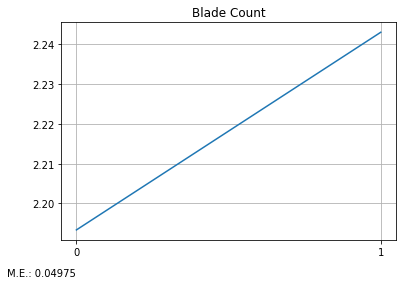

[2.1966666666666668, 2.2397500000000004] 2


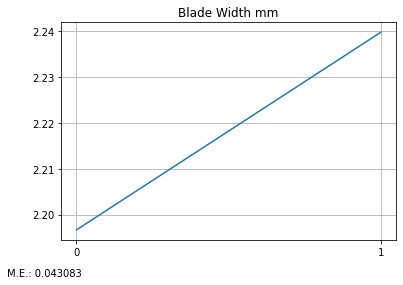

[2.0894999999999997, 2.3469166666666665] 2


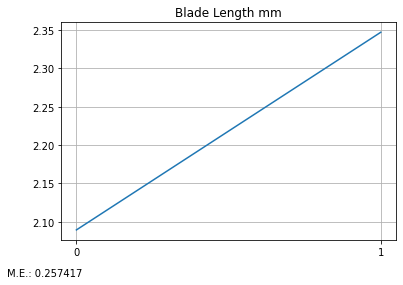

[2.202833333333333, 2.2335833333333333] 2


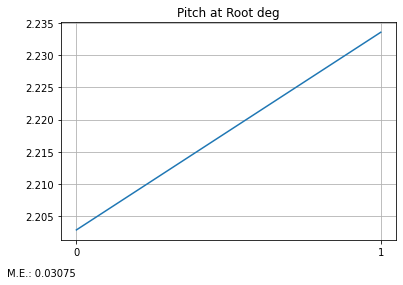

In [92]:
results_col_name = 'Readings Average grams'
sample_count = 3

col_names_factors = ['Blade Count', 'Blade Width mm', 'Blade Length mm', 'Pitch at Root deg']

for each in col_names_factors:
    kv, levels = main_effect(df_doe, each, results_col_name, sample_count)
    print(kv, levels)
    x = [i for i in range(levels)]
    pyplot.figure()
    pyplot.plot(x, kv)
    pyplot.title(each)
    pyplot.figtext(x=0, y=0, s= "M.E.: " + str(round(kv[1] - kv[0], 6)))
    pyplot.xticks(np.arange(min(x), max(x)+1, 1))
    pyplot.grid(visible=True)
    pyplot.show()
    
    #pyplot.errorbar(x=x, y=y, yerr=MSE, marker="s", capsize=5)

*Interaction effects*

In [93]:
from statsmodels.graphics.factorplots import interaction_plot

In [94]:
def replace_with_levels_modified(df, target):
    df_select = df[target].copy("deep").dropna()
    
    # Get different distinct values
    distinct_values = df_select.unique().tolist()
    distinct_values.sort()
    
    for idx, val in enumerate(df_select):
        r = distinct_values.index(val)
        df_select.loc[idx] = r

    return df_select.to_frame(name=target)

In [109]:
new_df_2 = new_df.copy("deep")

col_names_factors = ['Blade Count', 'Blade Width mm', 'Blade Length mm', 'Pitch at Root deg']

for each in col_names_factors:
    temp = replace_with_levels_modified(new_df_2, each)
    new_df_2[each] = temp
    
#print(new_df_2)

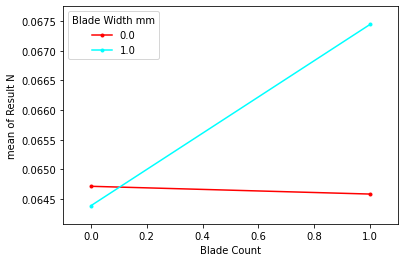

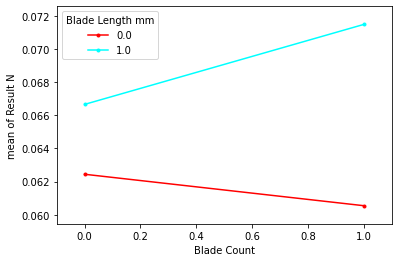

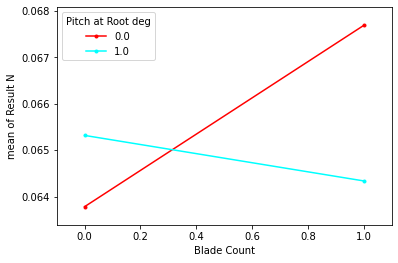

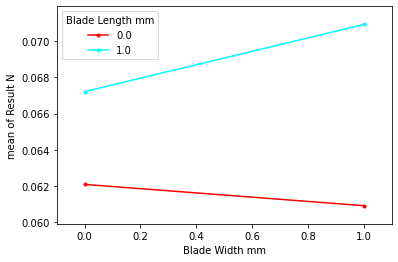

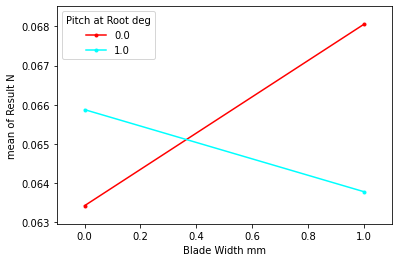

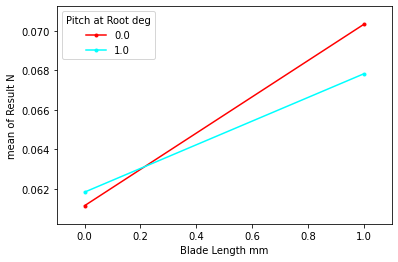

In [110]:
interaction_plot(new_df_2[col_names_factors[0]], new_df_2[col_names_factors[1]], new_df_2['Result N'])
pyplot.savefig("bcxbw.svg")

interaction_plot(new_df_2[col_names_factors[0]], new_df_2[col_names_factors[2]], new_df_2['Result N'])
pyplot.savefig("bcxbl.svg")

interaction_plot(new_df_2[col_names_factors[0]], new_df_2[col_names_factors[3]], new_df_2['Result N'])
pyplot.savefig("bcxp.svg")

interaction_plot(new_df_2[col_names_factors[1]], new_df_2[col_names_factors[2]], new_df_2['Result N'])
pyplot.savefig("bwxbll.svg")

interaction_plot(new_df_2[col_names_factors[1]], new_df_2[col_names_factors[3]], new_df_2['Result N'])
pyplot.savefig("bwxp.svg")

interaction_plot(new_df_2[col_names_factors[2]], new_df_2[col_names_factors[3]], new_df_2['Result N'])
pyplot.savefig("blxp.svg")

In [6]:
import scipy.stats as ss

F_crit = ss.f.ppf(1-0.05, 1, 16)
print(F_crit)

4.493998477666352
